# 3 - Principal Component Regression(PCR)

**Principle Component Regression (PCR) is an algorithm for reducing the multi-collinearity of a dataset. The problem we face in multi-variate linear regression (linear regression with a large number of features) is that although it may appear that we do fit the model well, there is normally a high-variance problem on the test set.**

**PCR applies size reduction to the variables and the model is built with these reduced variables.**

**PCR is especially used to overcome the problem with collinearity in linear regression by combining explanatory variables to a smaller set of uncorrelated variables.**

**Model coefficients will not be reliable due to inflation in the standart errors.**

**If multiple Linear Regression is used and there is a strong correlation between explanatory variables,model coefficients will not be related.This model will suffer from collinearity**

# Get dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Hitters.csv")
data = df.copy()
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# Checking null values

In [6]:
data.isnull().values.any()

True

In [7]:
data = data.dropna()
data.isnull().values.any()

False

In [11]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


# Describe Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


**There are some categorical variables.We need to convert these variables into numeric format in a way that our machine learning model will understand.**

**In case,Dummy Variables will help us but be careful Dummy Variable Trap**

In [12]:
dummies = pd.get_dummies(data[["League","Division","NewLeague"]])
dummies.head(10)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
6,0,1,1,0,1,0
7,1,0,0,1,1,0
8,0,1,0,1,0,1
9,1,0,1,0,1,0
10,1,0,1,0,1,0


In [14]:
X_pre = data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X_pre.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
6,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0
7,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,121.0,283.0,9.0
8,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,143.0,290.0,19.0
9,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,0.0,0.0,0.0
10,574.0,159.0,21.0,107.0,75.0,59.0,10.0,4631.0,1300.0,90.0,702.0,504.0,488.0,238.0,445.0,22.0


# Concancate dummies variables with our dataset

In [15]:
X = pd.concat([X_pre,dummies[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
6,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,76.0,127.0,7.0,1,0,0
7,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,121.0,283.0,9.0,0,1,0
8,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,143.0,290.0,19.0,1,1,1
9,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,0.0,0.0,0.0,0,0,0
10,574.0,159.0,21.0,107.0,75.0,59.0,10.0,4631.0,1300.0,90.0,702.0,504.0,488.0,238.0,445.0,22.0,0,0,0


In [16]:
y = data["Salary"]
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

# Split train and test 

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 19)
(210,)
(53, 19)
(53,)


# Import model

In [19]:
# Import model library
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Define model
pca = PCA()

X_reduced_train = pca.fit_transform(scale(X_train))

In [21]:
X_reduced_train.shape

(210, 19)

In [23]:
X_train[:1]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
188,279.0,64.0,0.0,31.0,26.0,30.0,1.0,279.0,64.0,0.0,31.0,26.0,30.0,107.0,205.0,16.0,1,1,1


In [24]:
X_reduced_train[:1]

array([[-3.61787348e+00,  6.31871191e-01,  1.76335390e+00,
        -1.45368727e-01,  7.80600603e-01, -3.77852418e-01,
        -2.42289345e-01, -6.14224147e-01, -3.43410970e-01,
         5.31634712e-01, -8.18987142e-03, -1.41143709e-01,
         2.28847329e-01, -1.21921339e-01, -1.62938311e-01,
        -7.72679730e-02, -2.04257178e-02,  1.58447450e-02,
        -2.74914865e-03]])

In [25]:
pca.explained_variance_ratio_

array([3.79728446e-01, 2.24482620e-01, 1.09207495e-01, 7.68094092e-02,
       5.27968112e-02, 4.24570711e-02, 3.63447368e-02, 2.71227606e-02,
       1.34160159e-02, 9.53365482e-03, 7.71669218e-03, 6.62829947e-03,
       5.18449210e-03, 3.17727672e-03, 2.79261042e-03, 1.46896109e-03,
       8.23892193e-04, 2.50751774e-04, 5.80031537e-05])

# Explained variance ratio

In [27]:
# Model with 10 variables
variableNumber = 10
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:variableNumber]

array([37.97, 60.42, 71.34, 79.02, 84.3 , 88.55, 92.18, 94.89, 96.23,
       97.18])

In [28]:
# Model with 5 variables
variableNumber = 5
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:variableNumber]

array([37.97, 60.42, 71.34, 79.02, 84.3 ])

# Fit the model

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)

In [33]:
pcr_model.coef_

array([ 109.98783586,  -17.40538045,   13.45162102,   31.5242491 ,
        -52.57520276,   51.42192285,   55.13007083,   13.79647799,
         38.84012364,  172.59260908,   23.34042216,   47.85941324,
         42.96028568, -321.17124181,  -30.65210744,  415.93335042,
       -441.09170573,  638.286139  ,  -57.32973902])

In [34]:
pcr_model.score(X_reduced_train,y_train)

0.5483414143981389

# Prediction

In [36]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[:10]

array([ 175.68153064,  769.36656014,  471.85170854,  735.57754016,
       1502.25473866,  422.09453138, 1133.81618371, 1113.27939431,
        690.07066336,  280.15942463])

# Find MSE and RMSE Loss Value

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train,y_pred)
rmse = np.sqrt(mse)

print(f"MSE Train Loss = {mse}")
print(f"RMSE Train Loss = {rmse}")

MSE Train Loss = 98781.70140273422
RMSE Train Loss = 314.2955637655966


In [40]:
# Find test loss
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))

y_pred_test = pcr_model.predict(X_reduced_test)

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_test)
print(f"MSE Test Loss = {mse_test}")
print(f"RMSE Test Loss = {rmse_test}")


MSE Test Loss = 109881.21854273905
RMSE Test Loss = 331.48336088367853


# Model Tuning

In [49]:
# Let's choose 10 variables for the model

linearModel = LinearRegression()
pcr_model = linearModel.fit(X_reduced_test[:,:10],y_test)
y_pred = pcr_model.predict(X_reduced_test[:,:10])
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"MSE Loss for 10 variables = {mse}")
print(f"RMSE Loss for 10 variables = {rmse}")

MSE Loss for 10 variables = 41711.19213032218
RMSE Loss for 10 variables = 204.2331807770769


In [52]:
# Apply cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv_10 = KFold(n_splits=10,shuffle=True,random_state=33)

In [53]:
X_reduced_test.shape

(53, 19)

In [58]:
# Find the best variable size for PCA Model
max_variable_size = X_reduced_test.shape[1] # --> 19
RMSE_values = []

lm = LinearRegression()
for i in range(1,max_variable_size+1):
    score = np.sqrt(-cross_val_score(lm,X_reduced_train[:,:i],y_train.ravel(),
                                   cv=cv_10,scoring="neg_mean_squared_error").mean())
    RMSE_values.append(score)
print("Finished")

Finished


In [64]:
np.array(RMSE_values)

array([369.23962268, 369.4686441 , 373.22782491, 372.81822561,
       369.54648066, 366.56963314, 365.99230469, 367.63060758,
       369.47963985, 362.70467733, 365.02662569, 366.64151762,
       367.30682293, 360.77217163, 361.76671985, 358.29799446,
       357.40906344, 357.61497731, 365.60684464])

In [65]:
# Find the best optimum variable size
optimum_size = np.array(RMSE_values).argmin()
print(f"Optimal variable size for PCA Model = {optimum_size}")

Optimal variable size for PCA Model = 16


Text(0, 0.5, 'RMSE Value')

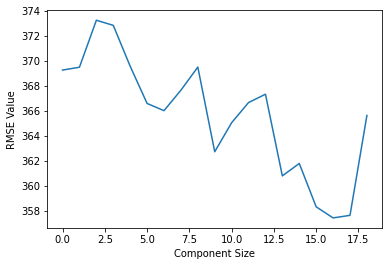

In [67]:
# Plot the loss values graph

plt.plot(RMSE_values)
plt.xlabel("Component Size")
plt.ylabel("RMSE Value")

# Create model with optimum hyperparameters(Tuned Model)

In [69]:
linear_model = LinearRegression()

pcr_tuned_model = linear_model.fit(X_reduced_train[:,:16],y_train)
y_pred_tuned = pcr_tuned_model.predict(X_reduced_train[:,:16])

#Find Tuned MSE and RMSE Loss
mse_train = mean_squared_error(y_train,y_pred_tuned)
rmse_train = np.sqrt(mse_train)

print(f"MSE Train Loss = {mse_train}")
print(f"RMSE Train Loss = {rmse_train}")


MSE Train Loss = 103771.9990020615
RMSE Train Loss = 322.13661543211987
